In [ ]:
#https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd
#https://www.kaggle.com/ldfreeman3/a-data-science-framework-to-achieve-99-accuracy
#https://www.kaggle.com/leonardolima/titanic-competition-notebook-0-80-top-10

In [ ]:
!git clone https://gitlab.com/mirsakhawathossain/pha-ml.git

fatal: destination path 'pha-ml' already exists and is not an empty directory.


In [ ]:
!cd pha-ml
!ls

pha-ml	sample_data


In [ ]:
import pandas as pd

In [ ]:
asteroid_data = pd.read_csv('pha-ml/Dataset/dataset.csv',index_col=['spkid']).sort_index(axis=0)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3,4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
asteroid_data.head(5)

,id,full_name,pdes,name,prefix,neo,pha,H,diameter,albedo,diameter_sigma,orbit_id,epoch,epoch_mjd,epoch_cal,equinox,e,a,q,i,om,w,ma,ad,n,tp,tp_cal,per,per_y,moid,moid_ld,sigma_e,sigma_a,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
spkid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2000001,a0000001,1 Ceres,1,Ceres,NaN,N,N,3.40,939.400,0.0900,0.200,JPL 47,2458600.5,58600,20190427.0,J2000,0.076009,2.769165,2.558684,10.594067,80.305531,73.597695,77.372098,2.979647,0.213885,2.458239e+06,2.018043e+07,1683.145703,4.608202,1.59478,620.640533,4.819000e-12,1.032800e-11,1.956900e-11,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
2000002,a0000002,2 Pallas,2,Pallas,NaN,N,N,4.20,545.000,0.1010,18.000,JPL 37,2459000.5,59000,20200531.0,J2000,0.229972,2.773841,2.135935,34.832932,173.024741,310.202392,144.975675,3.411748,0.213345,2.458321e+06,2.018072e+07,1687.410992,4.619880,1.23429,480.348639,3.193400e-08,4.033700e-09,8.832200e-08,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
2000003,a0000003,3 Juno,3,Juno,NaN,N,N,5.33,246.596,0.2140,10.594,JPL 112,2459000.5,59000,20200531.0,J2000,0.256936,2.668285,1.982706,12.991043,169.851482,248.066193,125.435355,3.353865,0.226129,2.458446e+06,2.018112e+07,1592.013769,4.358696,1.03429,402.514639,3.052000e-08,3.471800e-09,8.139200e-08,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
2000004,a0000004,4 Vesta,4,Vesta,NaN,N,N,3.00,525.400,0.4228,0.200,JPL 35,2458600.5,58600,20190427.0,J2000,0.088721,2.361418,2.151909,7.141771,103.810804,150.728541,95.861938,2.570926,0.271609,2.458248e+06,2.018051e+07,1325.432763,3.628837,1.13948,443.451432,2.332100e-10,1.514300e-09,1.928600e-09,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
2000005,a0000005,5 Astraea,5,Astraea,NaN,N,N,6.90,106.699,0.2740,3.140,JPL 114,2459000.5,59000,20200531.0,J2000,0.190913,2.574037,2.082619,5.367427,141.571026,358.648418,17.846343,3.065455,0.238661,2.458926e+06,2.020032e+07,1508.414421,4.129814,1.09575,426.433028,2.373700e-08,3.970900e-09,6.092400e-08,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191


In [ ]:
asteroid_data.tail(5)

,id,full_name,pdes,name,prefix,neo,pha,H,diameter,albedo,diameter_sigma,orbit_id,epoch,epoch_mjd,epoch_cal,equinox,e,a,q,i,om,w,ma,ad,n,tp,tp_cal,per,per_y,moid,moid_ld,sigma_e,sigma_a,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
spkid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
54017228,bK20K04K,(2020 KK4),2020 KK4,NaN,NaN,Y,N,26.141,NaN,NaN,NaN,JPL 1,2458993.5,58993,20200524.0,J2000,0.395881,1.604304,0.969190,3.638559,241.461273,322.686496,15.881351,2.239418,0.485036,2.458961e+06,2.020042e+07,742.212726,2.032068,0.006093,2.371080,0.000818,0.002093,0.000048,0.005783,0.001141,0.003870,0.037536,0.002922,0.000949,0.013315,1.45270,APO,0.63662
54017229,bK20K04M,(2020 KM4),2020 KM4,NaN,NaN,Y,N,27.898,NaN,NaN,NaN,JPL 1,2459000.5,59000,20200531.0,J2000,0.223160,1.271914,0.988073,6.094056,64.571204,214.529904,341.603063,1.555754,0.687096,2.459027e+06,2.020063e+07,523.943978,1.434480,0.005380,2.093544,0.000383,0.000581,0.000035,0.009403,0.000130,0.000195,0.016399,0.000711,0.000471,0.005509,0.35924,APO,0.42725
54017230,bK20K04O,(2020 KO4),2020 KO4,NaN,NaN,Y,N,26.980,NaN,NaN,NaN,JPL 1,2458991.5,58991,20200522.0,J2000,0.567768,2.175390,0.940274,3.579334,65.150716,220.493639,348.725881,3.410506,0.307184,2.459028e+06,2.020063e+07,1171.936620,3.208588,0.003895,1.515833,0.000964,0.004640,0.000091,0.004373,0.000994,0.003949,0.038764,0.007274,0.000983,0.008769,3.74950,APO,0.61686
54017231,bK20K04N,(2020 KN4),2020 KN4,NaN,NaN,Y,N,21.510,NaN,NaN,NaN,JPL 1,2458994.5,58994,20200525.0,J2000,0.292102,1.059285,0.749866,34.546369,247.860565,249.476426,76.239413,1.368704,0.904034,2.458910e+06,2.020030e+07,398.215030,1.090253,0.057911,22.537107,0.001026,0.002513,0.000693,0.188380,0.015119,0.335950,0.485930,0.003247,0.003217,0.237400,1.41730,APO,0.25400
54017232,bK20K04Q,(2020 KQ4),2020 KQ4,NaN,NaN,Y,N,26.419,NaN,NaN,NaN,JPL 1,2459000.5,59000,20200531.0,J2000,0.133246,1.065046,0.923133,4.922687,60.470005,106.428094,67.343617,1.206958,0.896709,2.458925e+06,2.020032e+07,401.467813,1.099159,0.002528,0.983884,0.000585,0.000400,0.000277,0.021693,0.002847,0.035812,0.097113,0.000454,0.000505,0.065993,0.22627,APO,0.45051


In [ ]:
asteroid_data.isnull().sum()

id                     0
full_name              0
pdes                   0
name              936460
prefix            958506
neo                    4
pha                19921
H                   6263
diameter          822315
albedo            823421
diameter_sigma    822443
orbit_id               0
epoch                  0
epoch_mjd              0
epoch_cal              0
equinox                0
e                      0
a                      0
q                      0
i                      0
om                     0
w                      0
ma                     1
ad                     4
n                      0
tp                     0
tp_cal                 0
per                    4
per_y                  1
moid               19921
moid_ld              127
sigma_e            19922
sigma_a            19922
sigma_q            19922
sigma_i            19922
sigma_om           19922
sigma_w            19922
sigma_ma           19922
sigma_ad           19926
sigma_n            19922


In [ ]:
asteroid_data.shape

(958524, 44)

In [ ]:
dataframe=asteroid_data.drop(columns=['name','epoch','prefix','orbit_id','id','pha','full_name','pdes','diameter_sigma','epoch_mjd','epoch_cal','equinox','neo','sigma_e','sigma_a','sigma_q','sigma_i','sigma_om','sigma_om','sigma_w','sigma_ma','sigma_ad','sigma_n','sigma_tp','sigma_per','rms','per_y','moid','tp','tp_cal'])

In [ ]:
dataframe.head(5)

,H,diameter,albedo,e,a,q,i,om,w,ma,ad,n,per,moid_ld,class
spkid,,,,,,,,,,,,,,,
2000001,3.40,939.400,0.0900,0.076009,2.769165,2.558684,10.594067,80.305531,73.597695,77.372098,2.979647,0.213885,1683.145703,620.640533,MBA
2000002,4.20,545.000,0.1010,0.229972,2.773841,2.135935,34.832932,173.024741,310.202392,144.975675,3.411748,0.213345,1687.410992,480.348639,MBA
2000003,5.33,246.596,0.2140,0.256936,2.668285,1.982706,12.991043,169.851482,248.066193,125.435355,3.353865,0.226129,1592.013769,402.514639,MBA
2000004,3.00,525.400,0.4228,0.088721,2.361418,2.151909,7.141771,103.810804,150.728541,95.861938,2.570926,0.271609,1325.432763,443.451432,MBA
2000005,6.90,106.699,0.2740,0.190913,2.574037,2.082619,5.367427,141.571026,358.648418,17.846343,3.065455,0.238661,1508.414421,426.433028,MBA


In [ ]:
dataframe.tail(5)

,H,diameter,albedo,e,a,q,i,om,w,ma,ad,n,per,moid_ld,class
spkid,,,,,,,,,,,,,,,
54017228,26.141,NaN,NaN,0.395881,1.604304,0.969190,3.638559,241.461273,322.686496,15.881351,2.239418,0.485036,742.212726,2.371080,APO
54017229,27.898,NaN,NaN,0.223160,1.271914,0.988073,6.094056,64.571204,214.529904,341.603063,1.555754,0.687096,523.943978,2.093544,APO
54017230,26.980,NaN,NaN,0.567768,2.175390,0.940274,3.579334,65.150716,220.493639,348.725881,3.410506,0.307184,1171.936620,1.515833,APO
54017231,21.510,NaN,NaN,0.292102,1.059285,0.749866,34.546369,247.860565,249.476426,76.239413,1.368704,0.904034,398.215030,22.537107,APO
54017232,26.419,NaN,NaN,0.133246,1.065046,0.923133,4.922687,60.470005,106.428094,67.343617,1.206958,0.896709,401.467813,0.983884,APO


In [ ]:
dataframe.isnull().sum()

H             6263
diameter    822315
albedo      823421
e                0
a                0
q                0
i                0
om               0
w                0
ma               1
ad               4
n                0
per              4
moid_ld        127
class            0
dtype: int64

In [ ]:
dataframe['class'].value_counts()

MBA    855954
OMB     28355
IMB     20360
MCA     18685
APO     12687
AMO      8457
TJN      8221
TNO      3468
ATE      1729
CEN       506
AST        76
IEO        22
HYA         4
Name: class, dtype: int64

In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 958524 entries, 2000001 to 54017232
Data columns (total 15 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   H         952261 non-null  float64
 1   diameter  136209 non-null  float64
 2   albedo    135103 non-null  float64
 3   e         958524 non-null  float64
 4   a         958524 non-null  float64
 5   q         958524 non-null  float64
 6   i         958524 non-null  float64
 7   om        958524 non-null  float64
 8   w         958524 non-null  float64
 9   ma        958523 non-null  float64
 10  ad        958520 non-null  float64
 11  n         958524 non-null  float64
 12  per       958520 non-null  float64
 13  moid_ld   958397 non-null  float64
 14  class     958524 non-null  object 
dtypes: float64(14), object(1)
memory usage: 117.0+ MB


In [ ]:
dataframe['diameter']=dataframe['diameter'].astype('float64')
dataframe['class']=dataframe['class'].astype('category')

In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 958524 entries, 2000001 to 54017232
Data columns (total 15 columns):
 #   Column    Non-Null Count   Dtype   
---  ------    --------------   -----   
 0   H         952261 non-null  float64 
 1   diameter  136209 non-null  float64 
 2   albedo    135103 non-null  float64 
 3   e         958524 non-null  float64 
 4   a         958524 non-null  float64 
 5   q         958524 non-null  float64 
 6   i         958524 non-null  float64 
 7   om        958524 non-null  float64 
 8   w         958524 non-null  float64 
 9   ma        958523 non-null  float64 
 10  ad        958520 non-null  float64 
 11  n         958524 non-null  float64 
 12  per       958520 non-null  float64 
 13  moid_ld   958397 non-null  float64 
 14  class     958524 non-null  category
dtypes: category(1), float64(14)
memory usage: 110.6 MB


In [ ]:
dataframe['diameter'].fillna(dataframe.groupby('class')['diameter'].transform('median'),inplace=True)
dataframe['H'].fillna(dataframe.groupby('class')['H'].transform('median'),inplace=True)
dataframe['albedo'].fillna(dataframe.groupby('class')['albedo'].transform('median'),inplace=True)
dataframe['ma'].fillna(dataframe.groupby('class')['ma'].transform('median'),inplace=True)
dataframe['ad'].fillna(dataframe.groupby('class')['ad'].transform('median'),inplace=True)
dataframe['per'].fillna(dataframe.groupby('class')['per'].transform('median'),inplace=True)
dataframe['moid_ld'].fillna(dataframe.groupby('class')['moid_ld'].transform('median'),inplace=True)


In [ ]:
dataframe.groupby('class')['diameter'].transform('median')
dataframe.head(5)

,H,diameter,albedo,e,a,q,i,om,w,ma,ad,n,per,moid_ld,class
spkid,,,,,,,,,,,,,,,
2000001,3.40,939.400,0.0900,0.076009,2.769165,2.558684,10.594067,80.305531,73.597695,77.372098,2.979647,0.213885,1683.145703,620.640533,MBA
2000002,4.20,545.000,0.1010,0.229972,2.773841,2.135935,34.832932,173.024741,310.202392,144.975675,3.411748,0.213345,1687.410992,480.348639,MBA
2000003,5.33,246.596,0.2140,0.256936,2.668285,1.982706,12.991043,169.851482,248.066193,125.435355,3.353865,0.226129,1592.013769,402.514639,MBA
2000004,3.00,525.400,0.4228,0.088721,2.361418,2.151909,7.141771,103.810804,150.728541,95.861938,2.570926,0.271609,1325.432763,443.451432,MBA
2000005,6.90,106.699,0.2740,0.190913,2.574037,2.082619,5.367427,141.571026,358.648418,17.846343,3.065455,0.238661,1508.414421,426.433028,MBA


In [ ]:
dataframe.tail(5)

,H,diameter,albedo,e,a,q,i,om,w,ma,ad,n,per,moid_ld,class
spkid,,,,,,,,,,,,,,,
54017228,26.141,0.6025,0.1455,0.395881,1.604304,0.969190,3.638559,241.461273,322.686496,15.881351,2.239418,0.485036,742.212726,2.371080,APO
54017229,27.898,0.6025,0.1455,0.223160,1.271914,0.988073,6.094056,64.571204,214.529904,341.603063,1.555754,0.687096,523.943978,2.093544,APO
54017230,26.980,0.6025,0.1455,0.567768,2.175390,0.940274,3.579334,65.150716,220.493639,348.725881,3.410506,0.307184,1171.936620,1.515833,APO
54017231,21.510,0.6025,0.1455,0.292102,1.059285,0.749866,34.546369,247.860565,249.476426,76.239413,1.368704,0.904034,398.215030,22.537107,APO
54017232,26.419,0.6025,0.1455,0.133246,1.065046,0.923133,4.922687,60.470005,106.428094,67.343617,1.206958,0.896709,401.467813,0.983884,APO


In [ ]:
dataframe.isnull().sum()

H            0
diameter    26
albedo      26
e            0
a            0
q            0
i            0
om           0
w            0
ma           0
ad           4
n            0
per          4
moid_ld      0
class        0
dtype: int64

In [ ]:
dataframe[['diameter','albedo','ad','per']]=dataframe[['diameter','albedo','ad','per']].fillna(value=dataframe[['diameter','albedo','ad','per']].median())

In [ ]:
dataframe.isnull().sum()

H           0
diameter    0
albedo      0
e           0
a           0
q           0
i           0
om          0
w           0
ma          0
ad          0
n           0
per         0
moid_ld     0
class       0
dtype: int64

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [ ]:
correlation=dataframe.corr()

In [ ]:
correlation

,H,diameter,albedo,e,a,q,i,om,w,ma,ad,n,per,moid_ld
H,1.000000,-0.459324,0.031089,0.344027,-0.032204,-0.437553,-0.097735,0.000835,-0.003393,-0.033667,-0.024352,0.588762,-0.004487,-0.435391
diameter,-0.459324,1.000000,-0.125696,-0.053131,0.058647,0.585610,0.045265,-0.004997,0.000563,0.004867,0.047404,-0.279425,0.013581,0.583244
albedo,0.031089,-0.125696,1.000000,0.000836,-0.007589,-0.096690,0.194051,0.013163,-0.001289,0.008890,-0.005674,0.339577,-0.001070,-0.091031
e,0.344027,-0.053131,0.000836,1.000000,0.014725,-0.119463,0.128171,0.003173,0.008671,-0.025741,0.025759,0.196245,0.012072,-0.107549
a,-0.032204,0.058647,-0.007589,0.014725,1.000000,0.074253,0.025212,-0.001993,-0.001237,0.001673,0.904901,-0.025440,0.888618,0.074082
q,-0.437553,0.585610,-0.096690,-0.119463,0.074253,1.000000,0.035545,-0.011010,-0.002149,-0.002272,0.053731,-0.328325,0.005505,0.995643
i,-0.097735,0.045265,0.194051,0.128171,0.025212,0.035545,1.000000,-0.016534,-0.003157,0.004420,0.037841,-0.012026,0.026036,0.043586
om,0.000835,-0.004997,0.013163,0.003173,-0.001993,-0.011010,-0.016534,1.000000,-0.138383,-0.000901,-0.001755,0.008162,-0.001423,-0.011027
w,-0.003393,0.000563,-0.001289,0.008671,-0.001237,-0.002149,-0.003157,-0.138383,1.000000,-0.006368,-0.001122,0.002910,-0.001237,-0.001985
ma,-0.033667,0.004867,0.008890,-0.025741,0.001673,-0.002272,0.004420,-0.000901,-0.006368,1.000000,0.000835,-0.006825,0.001830,-0.003235


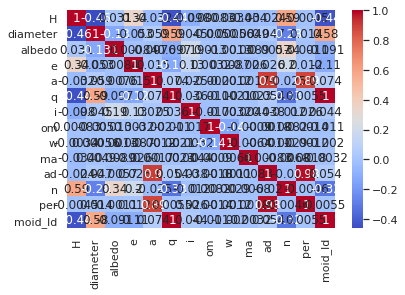

In [ ]:
sns.heatmap(dataframe.corr(),cmap='coolwarm',annot=True)

In [ ]:
dataframe.describe()

,H,diameter,albedo,e,a,q,i,om,w,ma,ad,n,per,moid_ld
count,958524.000000,958524.000000,958524.000000,958524.000000,958524.000000,958524.000000,958524.000000,958524.000000,958524.000000,958524.000000,958524.000000,9.585240e+05,9.585240e+05,958524.000000
mean,16.906900,4.237582,0.095562,0.156116,2.902143,2.394887,9.054901,168.456416,181.369457,177.352511,3.455819,2.366846e-01,5.085329e+03,539.422079
std,1.785576,4.551837,0.060440,0.092643,39.719503,2.139246,6.637656,102.881707,103.887995,105.816811,71.769252,7.941705e-02,2.308956e+06,834.839922
min,-1.100000,0.002500,0.001000,0.000000,-14702.447872,0.070511,0.007744,0.000025,0.000130,-70.703676,0.653773,1.608247e-07,1.511918e+02,0.000000
25%,16.100000,3.850000,0.081000,0.092193,2.387835,1.971401,4.165419,80.604399,91.482063,83.785037,2.781604,1.894969e-01,1.347739e+03,375.391728
50%,16.900000,3.850000,0.081000,0.145002,2.646969,2.225816,7.415665,159.826919,182.358081,175.640941,3.046995,2.288655e-01,1.572976e+03,477.717850
75%,17.700000,3.850000,0.081000,0.200650,3.001932,2.578315,12.407550,252.247751,271.521589,269.865669,3.364792,2.671142e-01,1.899765e+03,617.309237
max,33.200000,939.400000,1.000000,1.855356,33488.895955,80.398819,175.082901,359.999793,359.999646,491.618014,66972.796064,2.381082e+00,2.238462e+09,30929.908422


In [ ]:
df_asteroid=dataframe[['class','diameter']]

In [ ]:
df_asteroid.head(5)

,class,diameter
spkid,,
2000001,MBA,939.400
2000002,MBA,545.000
2000003,MBA,246.596
2000004,MBA,525.400
2000005,MBA,106.699


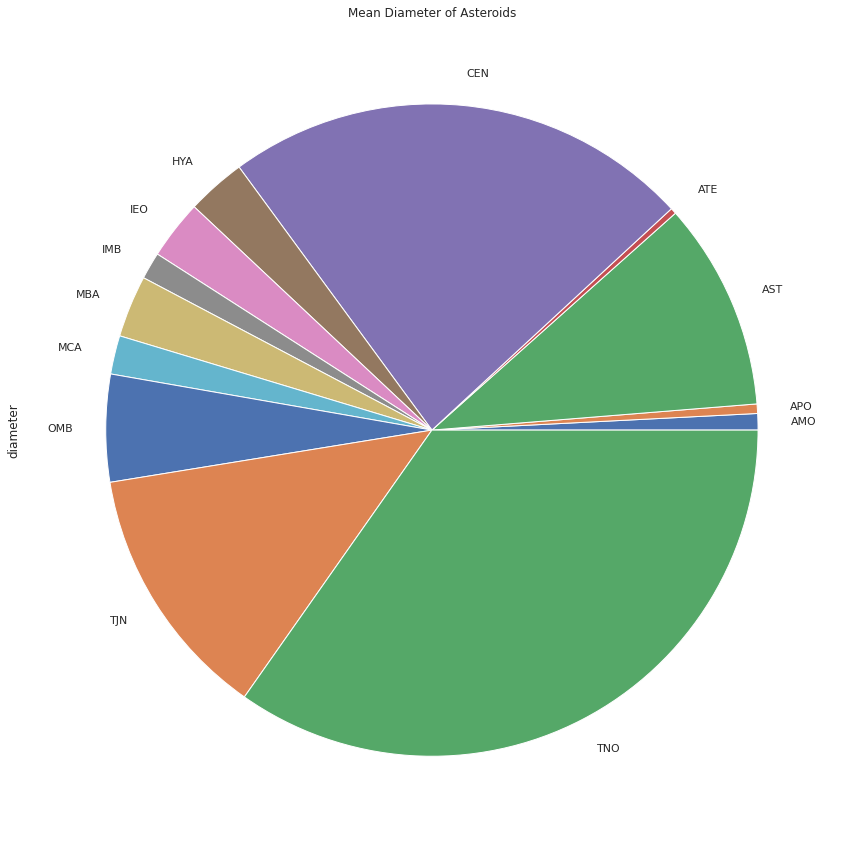

In [ ]:
df_asteroid.groupby('class')['diameter'].mean().plot(kind='pie',figsize=(20,15),title='Mean Diameter of Asteroids')
plt.show()

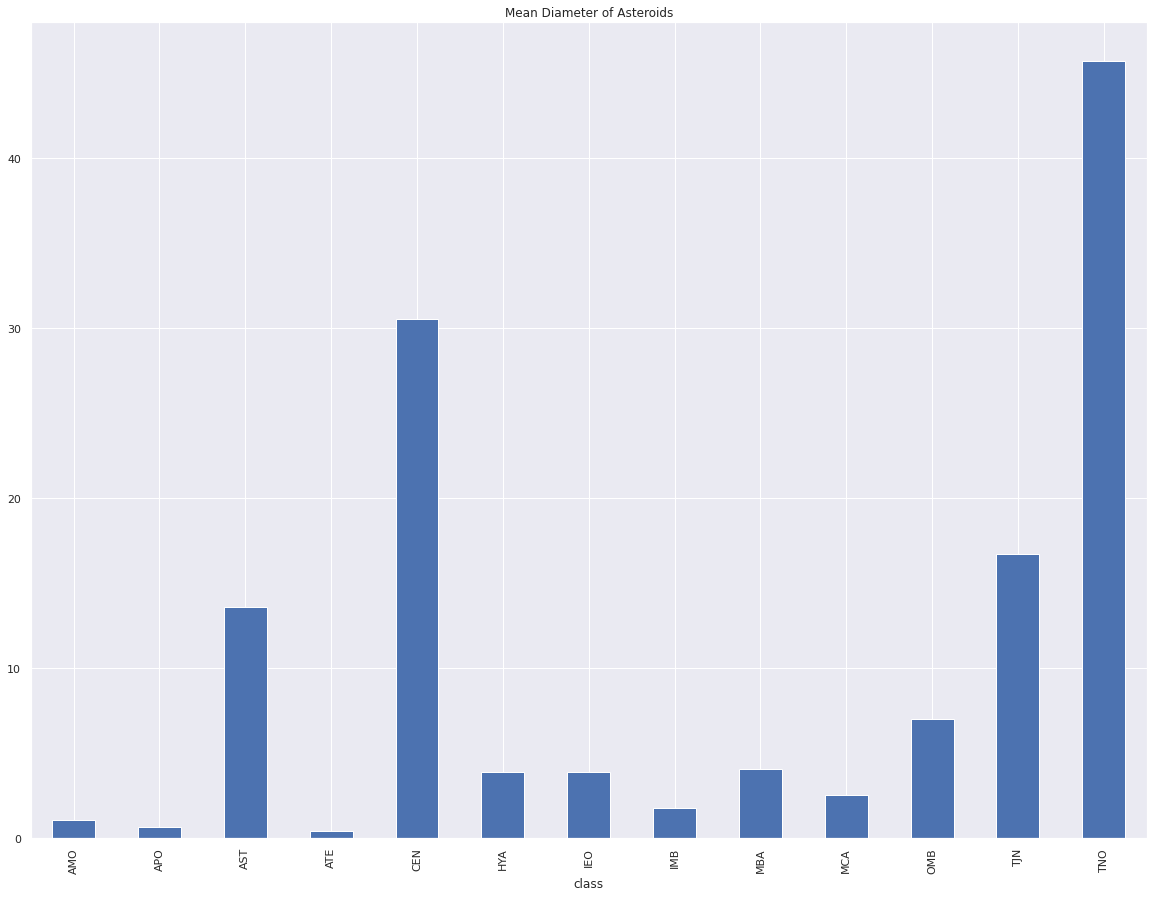

In [ ]:
df_asteroid.groupby('class')['diameter'].mean().plot(kind='bar',figsize=(20,15),title='Mean Diameter of Asteroids')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [ ]:
dataframe['class_cat']=labelencoder.fit_transform(dataframe['class'])

In [ ]:
dataframe.head(5)

,H,diameter,albedo,e,a,q,i,om,w,ma,ad,n,per,moid_ld,class,class_cat
spkid,,,,,,,,,,,,,,,,
2000001,3.40,939.400,0.0900,0.076009,2.769165,2.558684,10.594067,80.305531,73.597695,77.372098,2.979647,0.213885,1683.145703,620.640533,MBA,8
2000002,4.20,545.000,0.1010,0.229972,2.773841,2.135935,34.832932,173.024741,310.202392,144.975675,3.411748,0.213345,1687.410992,480.348639,MBA,8
2000003,5.33,246.596,0.2140,0.256936,2.668285,1.982706,12.991043,169.851482,248.066193,125.435355,3.353865,0.226129,1592.013769,402.514639,MBA,8
2000004,3.00,525.400,0.4228,0.088721,2.361418,2.151909,7.141771,103.810804,150.728541,95.861938,2.570926,0.271609,1325.432763,443.451432,MBA,8
2000005,6.90,106.699,0.2740,0.190913,2.574037,2.082619,5.367427,141.571026,358.648418,17.846343,3.065455,0.238661,1508.414421,426.433028,MBA,8


In [ ]:
dataframe['class_cat'].value_counts()

8     855954
10     28355
7      20360
9      18685
1      12687
0       8457
11      8221
12      3468
3       1729
4        506
2         76
6         22
5          4
Name: class_cat, dtype: int64

In [ ]:
X=dataframe.drop(['class','class_cat'],axis=1)

In [ ]:
y=dataframe['class_cat']

In [ ]:
X.shape

(958524, 14)

In [ ]:
y.shape

(958524,)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(575114, 14)
(383410, 14)


In [ ]:
X_test.isnull().sum()

H           0
diameter    0
albedo      0
e           0
a           0
q           0
i           0
om          0
w           0
ma          0
ad          0
n           0
per         0
moid_ld     0
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_pred=knn.predict(X_test)
from sklearn import metrics
print(metrics.accuracy_score(y_test,y_pred))

0.9789624683758901


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tree_clf = DecisionTreeClassifier(max_depth=2,random_state=42)



In [ ]:
tree_clf.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [102]:
features = dataframe.columns
features = features[:14]
class_names = list(set(dataframe.iloc[:,14]))

In [103]:
fn = ['H', 'diameter', 'albedo', 'e', 'a', 'q', 'i', 'om', 'w', 'ma', 'ad',
       'n', 'per', 'moid_ld']
cn = ['APO',
 'AST',
 'OMB',
 'ATE',
 'TNO',
 'IEO',
 'HYA',
 'TJN',
 'MCA',
 'CEN',
 'AMO',
 'IMB',
 'MBA']

In [108]:
from sklearn.tree import export_graphviz
from graphviz import Source
export_graphviz(tree_clf,
                out_file='tree.dot',
                feature_names=features,
                class_names=class_names,
                rounded=True,
                filled=True)

In [ ]:
list(set(dataframe.iloc[:,14]))

['APO',
 'AST',
 'OMB',
 'ATE',
 'TNO',
 'IEO',
 'HYA',
 'TJN',
 'MCA',
 'CEN',
 'AMO',
 'IMB',
 'MBA']

[Text(167.4, 181.2, 'X[11] <= 0.172\ngini = 0.201\nsamples = 958524\nvalue = [8457, 12687, 76, 1729, 506, 4, 22, 20360, 855954\n18685, 28355, 8221, 3468]'),
 Text(83.7, 108.72, 'X[11] <= 0.1\ngini = 0.469\nsamples = 40784\nvalue = [105, 50, 76, 0, 506, 3, 0, 0, 0, 0, 28355, 8221\n3468]'),
 Text(41.85, 36.23999999999998, 'gini = 0.471\nsamples = 12286\nvalue = [8, 4, 76, 0, 506, 3, 0, 0, 0, 0, 0, 8221, 3468]'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.01\nsamples = 28498\nvalue = [97, 46, 0, 0, 0, 0, 0, 0, 0, 0, 28355, 0, 0]'),
 Text(251.10000000000002, 108.72, 'X[5] <= 1.666\ngini = 0.129\nsamples = 917740\nvalue = [8352, 12637, 0, 1729, 0, 1, 22, 20360, 855954, 18685\n0, 0, 0]'),
 Text(209.25, 36.23999999999998, 'gini = 0.661\nsamples = 41426\nvalue = [8352, 12637, 0, 1729, 0, 1, 22, 0, 0, 18685, 0\n0, 0]'),
 Text(292.95, 36.23999999999998, 'gini = 0.045\nsamples = 876314\nvalue = [0, 0, 0, 0, 0, 0, 0, 20360, 855954, 0, 0, 0, 0]')]

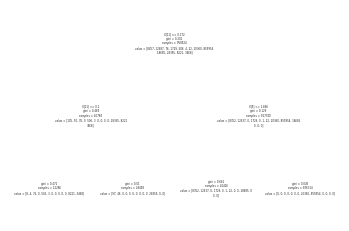

In [107]:
from sklearn import tree
tree.plot_tree(tree_clf)

In [109]:
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png'])

0

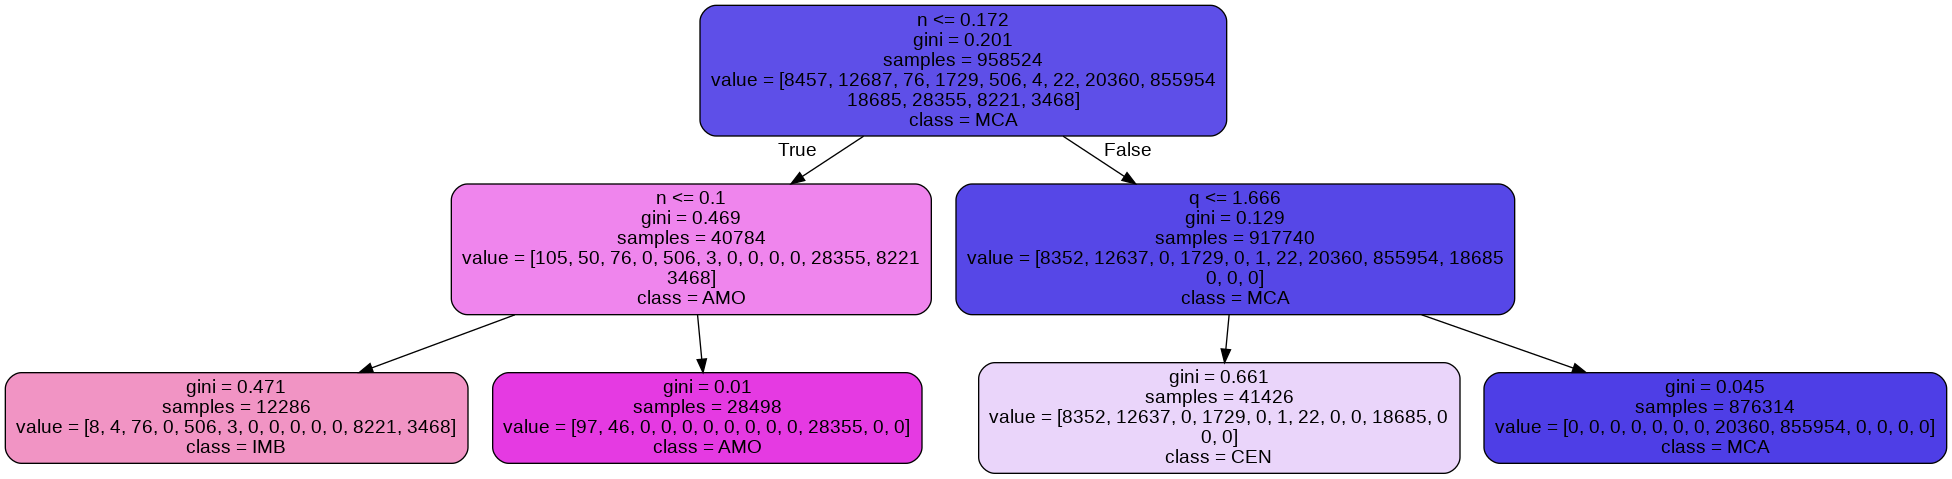

In [110]:
from IPython.display import Image
Image(filename='tree.png')